1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:, :2], y, test_size=0.2, random_state=1)

In [3]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k, type_weight=None):
    type_weight == 'number'
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append([distance, y_train[i]])

        classes = {class_item: 0 for class_item in set(y_train)}
        
        if type_weight == 'distance':
            # Вес от расстояния
            a = 1
            for d in test_distances:
                d[0] = d[0] / (d[0] + a)**1.5
            
        elif type_weight == 'number':
            # Вес от номера соседа
            a = 1
            for i, d in enumerate(sorted(test_distances, reverse=True)):
                d[0] = d[0] / (i + a)**2
        
        # Сортируем список и посчитаем частоту появления разных классов для первых k элементов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers


def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [4]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)
y_pred_dist = knn(X_train, y_train, X_test, k, type_weight='distance')
y_pred_numb = knn(X_train, y_train, X_test, k, type_weight='number')

print(f'Точность алгоритма без весов: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма с весами по расстоянию: {accuracy(y_pred_dist, y_test):.3f}')
print(f'Точность алгоритма с весами по номеру соседа: {accuracy(y_pred_numb, y_test):.3f}')

Точность алгоритма без весов: 0.867
Точность алгоритма с весами по расстоянию: 0.867
Точность алгоритма с весами по номеру соседа: 0.867


2*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить 
график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [5]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [6]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [7]:
def mean_sqr_cluster_distance(centroids, clusters):
    m_sqr_clust_dist = 0
    # Итерация по центроидам
    for key_centroid in zip(clusters.keys(), centroids):
        sum_metric_clust = 0
        # Итерация по точкам в кластере
        for point in clusters[key_centroid[0]]:
            # Расчет суммы квадратов расстояний внутри одного кластера
            sum_metric_clust += e_metrics(point, key_centroid[1])**2
        # Сумма по всем кластерам    
        m_sqr_clust_dist += sum_metric_clust / len(clusters[key_centroid[0]])
        
    return m_sqr_clust_dist

In [8]:
def get_plot_nclusters(X, max_clusters, max_iterations=10, min_distance=1e-4):
    distance = []
    x_plot = range(1, max_clusters + 1)
    for k in x_plot:
        centroids, clusters = kmeans(X, k, max_iterations, min_distance)
        distance.append(mean_sqr_cluster_distance(centroids, clusters))
        
    plt.figure(figsize=(10, 6))
    plt.xlim(0, max(x_plot) + 1)
    plt.ylim(0, max(distance) + 0.1*max(distance))
    plt.plot(x_plot, distance)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Среднее квадратичное внутриклассовое расстояние')
    plt.title('Зависимость расстояния от количества кластеров')
    plt.grid()
    plt.show()

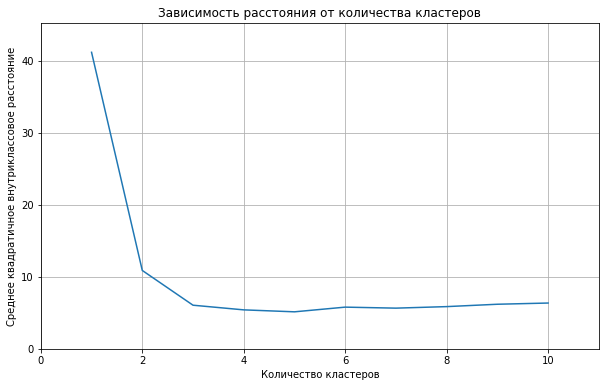

In [9]:
get_plot_nclusters(X, max_clusters=10, max_iterations=10, min_distance=1e-4)